In [51]:
import os
import nltk
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktTrainer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [52]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\conta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\conta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:



# Lê o texto
with open(os.path.join("data", "texto.txt"), "r", encoding="utf-8") as file:
    texto = file.read()

texto_full = " ".join(texto.splitlines())

# Treina o tokenizer com o próprio texto (funciona bem para português)
trainer = PunktTrainer()
trainer.INCLUDE_ALL_COLLOCS = True
trainer.train(texto_full)

tokenizer = PunktSentenceTokenizer(trainer.get_params()) #O PunktSentenceTokenizer pode ser treinado com texto em português
sent_tokens = tokenizer.tokenize(texto_full)

sent_tokens

#word_tokens = word_tokenize(sent_tokens)
#word_tokens





['O Produto Interno Bruto (PIB) do Brasil cresceu 1,4% no primeiro trimestre de 2025, frente aos três últimos meses do ano passado, informou o Instituto Brasileiro de Geografia e Estatística (IBGE) nesta sexta-feira (30).',
 'O crescimento foi puxado pela agropecuária, que avançou 12,2%.',
 'Também houve alta no setor de serviços (0,3%), enquanto a indústria não mostrou variação significativa (-0,1%).',
 'O resultado mostra uma aceleração significativa em relação ao crescimento revisado de 0,1% observado no último trimestre de 2024, mas ficou levemente abaixo das projeções do mercado, que apontavam um avanço de 1,5% no período, e do governo federal.']

In [54]:
word_tokens = word_tokenize(texto_full, language='portuguese', preserve_line=True)
word_tokens

['O',
 'Produto',
 'Interno',
 'Bruto',
 '(',
 'PIB',
 ')',
 'do',
 'Brasil',
 'cresceu',
 '1,4',
 '%',
 'no',
 'primeiro',
 'trimestre',
 'de',
 '2025',
 ',',
 'frente',
 'aos',
 'três',
 'últimos',
 'meses',
 'do',
 'ano',
 'passado',
 ',',
 'informou',
 'o',
 'Instituto',
 'Brasileiro',
 'de',
 'Geografia',
 'e',
 'Estatística',
 '(',
 'IBGE',
 ')',
 'nesta',
 'sexta-feira',
 '(',
 '30',
 ')',
 '.',
 'O',
 'crescimento',
 'foi',
 'puxado',
 'pela',
 'agropecuária',
 ',',
 'que',
 'avançou',
 '12,2',
 '%',
 '.',
 'Também',
 'houve',
 'alta',
 'no',
 'setor',
 'de',
 'serviços',
 '(',
 '0,3',
 '%',
 ')',
 ',',
 'enquanto',
 'a',
 'indústria',
 'não',
 'mostrou',
 'variação',
 'significativa',
 '(',
 '-0,1',
 '%',
 ')',
 '.',
 'O',
 'resultado',
 'mostra',
 'uma',
 'aceleração',
 'significativa',
 'em',
 'relação',
 'ao',
 'crescimento',
 'revisado',
 'de',
 '0,1',
 '%',
 'observado',
 'no',
 'último',
 'trimestre',
 'de',
 '2024',
 ',',
 'mas',
 'ficou',
 'levemente',
 'abaixo',
 'das

In [55]:
len(word_tokens)

125

In [56]:
fdist = nltk.FreqDist(word_tokens)
fdist

FreqDist({',': 7, '%': 6, 'de': 6, '(': 5, ')': 5, 'do': 4, 'no': 4, '.': 4, 'O': 3, 'trimestre': 2, ...})

In [57]:
fdist.most_common(10)

[(',', 7),
 ('%', 6),
 ('de', 6),
 ('(', 5),
 (')', 5),
 ('do', 4),
 ('no', 4),
 ('.', 4),
 ('O', 3),
 ('trimestre', 2)]

In [58]:
stop_words = set(stopwords.words('portuguese'))

In [59]:
filtered_words = [word for word in word_tokens if word.isalnum() and word not in stop_words]
filtered_words

['O',
 'Produto',
 'Interno',
 'Bruto',
 'PIB',
 'Brasil',
 'cresceu',
 'primeiro',
 'trimestre',
 '2025',
 'frente',
 'três',
 'últimos',
 'meses',
 'ano',
 'passado',
 'informou',
 'Instituto',
 'Brasileiro',
 'Geografia',
 'Estatística',
 'IBGE',
 'nesta',
 '30',
 'O',
 'crescimento',
 'puxado',
 'agropecuária',
 'avançou',
 'Também',
 'alta',
 'setor',
 'serviços',
 'enquanto',
 'indústria',
 'mostrou',
 'variação',
 'significativa',
 'O',
 'resultado',
 'mostra',
 'aceleração',
 'significativa',
 'relação',
 'crescimento',
 'revisado',
 'observado',
 'último',
 'trimestre',
 '2024',
 'ficou',
 'levemente',
 'abaixo',
 'projeções',
 'mercado',
 'apontavam',
 'avanço',
 'período',
 'governo',
 'federal']

In [60]:
fdist2 = FreqDist(filtered_words)
fdist2.most_common(10)

[('O', 3),
 ('trimestre', 2),
 ('crescimento', 2),
 ('significativa', 2),
 ('Produto', 1),
 ('Interno', 1),
 ('Bruto', 1),
 ('PIB', 1),
 ('Brasil', 1),
 ('cresceu', 1)]

<Axes: xlabel='Samples', ylabel='Counts'>

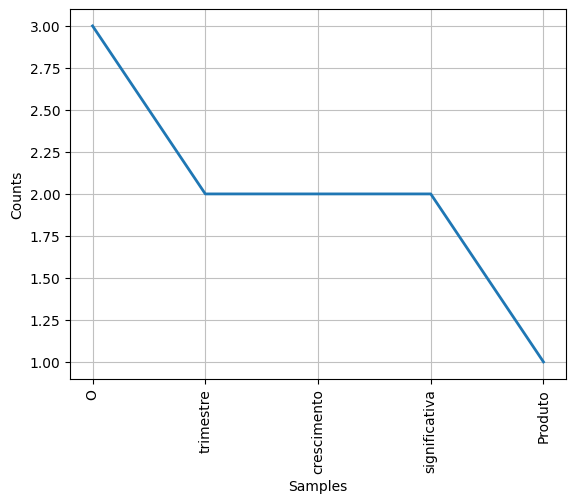

In [61]:
fdist2.plot(5)

In [62]:
def plot_wordcloud(wordcloud):
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [63]:
wc = WordCloud(
    width=800,
    height=400,
    random_state=1,
    background_color='white',
    stopwords=STOPWORDS.union(stop_words),
    colormap='viridis',
    collocations=False,  # Evita a formação de palavras compostas
).generate(texto_full)

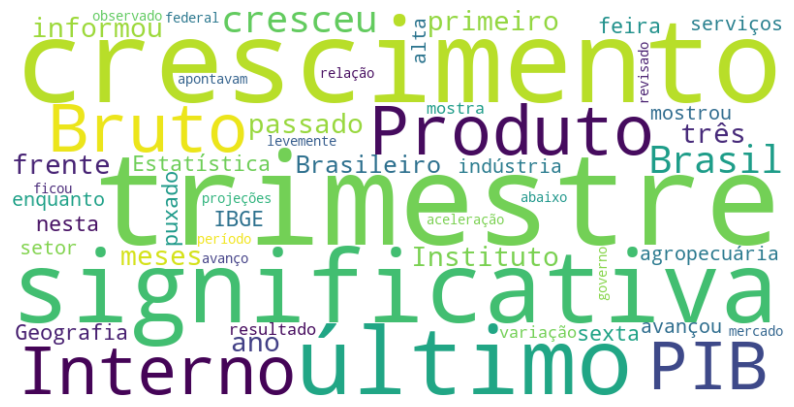

In [64]:
plot_wordcloud(wc)

In [72]:
mascara=np.array(Image.open("Data/upvote.png"))
mascara


array([[[248, 249, 250],
        [247, 249, 250],
        [248, 250, 251],
        ...,
        [248, 249, 250],
        [247, 249, 250],
        [248, 250, 251]],

       [[247, 249, 250],
        [248, 250, 251],
        [247, 249, 250],
        ...,
        [247, 249, 250],
        [248, 250, 251],
        [247, 249, 250]],

       [[248, 250, 251],
        [248, 249, 250],
        [248, 249, 250],
        ...,
        [248, 250, 251],
        [248, 249, 250],
        [248, 249, 250]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [83]:
wc2 = WordCloud(
    width=800,
    height=400,
    random_state=1,
    background_color='salmon',
    stopwords=STOPWORDS.union(stop_words),
    colormap='Pastel1',
    collocations=False,  # Evita a formação de palavras compostas
    mask=mascara,  # Define a máscara para a nuvem de palavras
)
wc2.generate(texto_full)

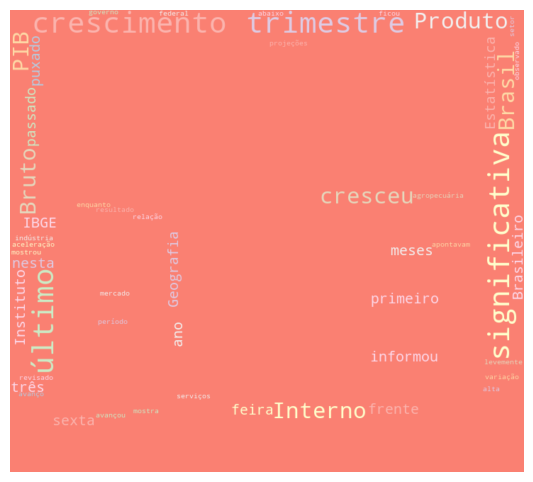

In [84]:
plot_wordcloud(wc2)